Q1. Explain the difference between linear regression and logistic regression models. Provide an example of
a scenario where logistic regression would be more appropriate.

Answer : 

Answer :

Linear regression and logistic regression are two common types of regression models in statistics and machine learning. Linear regression is used to model the relationship between a continuous dependent variable and one or more independent variables, while logistic regression is used to model the probability of a binary outcome based on one or more independent variables.

In linear regression, the goal is to find the best line that fits the data points in a way that minimizes the sum of squared differences between the predicted values and the actual values. The output of a linear regression model is a continuous variable that can take any value within a range. For example, if we are predicting house prices based on the number of bedrooms, the output of the linear regression model could be any value greater than or equal to zero.

In logistic regression, the goal is to model the probability of a binary outcome (i.e., 0 or 1) based on one or more independent variables. The output of a logistic regression model is a probability value between 0 and 1, which represents the likelihood of the binary outcome occurring. For example, if we are predicting whether a customer will buy a product based on their age, the output of the logistic regression model could be a probability value between 0 and 1.

Logistic regression would be more appropriate than linear regression in scenarios where the dependent variable is binary or categorical. For example, if we are trying to predict whether a customer will churn (i.e., stop using a product or service) based on their demographics and usage patterns, logistic regression would be a more appropriate model than linear regression. In this case, the output of the logistic regression model would be a probability value representing the likelihood of churn, rather than a continuous variable like house prices. The probability value could then be used to make decisions, such as whether to offer the customer a retention incentive.


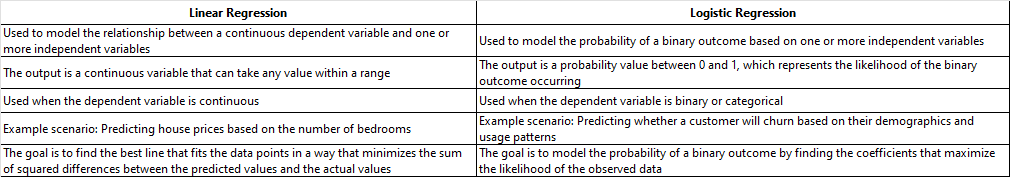

Q2. What is the cost function used in logistic regression, and how is it optimized?

Answer :

In logistic regression, the cost function is called the "logistic loss" or "cross-entropy loss" function. It measures the difference between the predicted probability values and the actual binary labels for the training data.
The logistic loss function is defined as follows:

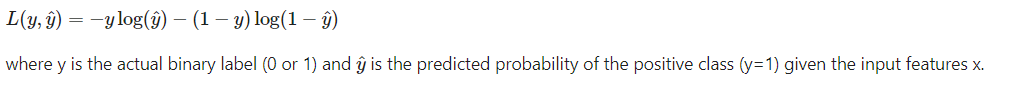

The goal of logistic regression is to find the values of the coefficients (i.e., the parameters) that minimize the logistic loss function. This is typically done using an optimization algorithm called gradient descent. Gradient descent iteratively updates the parameter values in the direction of steepest descent, moving towards the minimum of the cost function. The steps of gradient descent are as follows:
1. Initialize the coefficients to some values.

2. Calculate the predicted probabilities for the training data using the current coefficients.

3. Calculate the gradient of the cost function with respect to each coefficient.

4. Update each coefficient by subtracting a fraction (the learning rate) of the gradient from its current value.

5. Repeat steps 2-4 until convergence (i.e., until the cost function stops decreasing or a maximum number of iterations is reached).

There are also other optimization algorithms that can be used to optimize the logistic loss function, such as Newton's method and quasi-Newton methods. However, gradient descent is the most commonly used method due to its simplicity and efficiency.

###### Below is python code to show gradient descent on classification

In [9]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Generate some random classification data
X, y = make_classification(n_samples=1000, n_features=3,n_informative=3, n_redundant=0, n_classes=2, random_state=42)

# Add a column of ones for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Train a logistic regression model using scikit-learn
lr_sklearn = LogisticRegression(solver='saga',max_iter=1000)
lr_sklearn.fit(X, y)

# Define the logistic loss function
def logistic_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

# Initialize the coefficients to zero
theta = np.zeros(X.shape[1])

# Set the learning rate and the number of iterations
learning_rate = 0.01
n_iterations = 10000
print('Gradient Descent Started :\n')
cost_function = []
# Perform gradient descent
for i in range(n_iterations+1):
    # Calculate the predicted probabilities using the current coefficients
    y_pred = 1 / (1 + np.exp(-np.dot(X, theta)))
    
    # Calculate the gradient of the cost function with respect to each coefficient
    grad = np.dot(X.T, y_pred - y) / len(y)
    
    # Update each coefficient using the gradient and the learning rate
    theta -= learning_rate * grad
      
    # Calculate the cost (logistic loss) and print it every 1000 iterations    
    if i % 100 == 0:
        cost = logistic_loss(y, y_pred)
        cost_function.append(cost)
        print(f"Iteration {i}: Cost = {cost}")

print('\n========================================================================================\n')

# Print the final coefficients obtained by the custom implementation
print("Custom implementation coefficients:", theta)

# Print the coefficients obtained by scikit-learn
print("Scikit-learn coefficients:", lr_sklearn.coef_.flatten())

# Calculate the predicted probabilities using the custom implementation
y_pred_custom = 1 / (1 + np.exp(-np.dot(X, theta)))


print('\n========================================================================================\n')
# Calculate the accuracy using the custom implementation
acc_custom = accuracy_score(y, np.round(y_pred_custom))
print("Custom implementation accuracy:", acc_custom)

# Calculate the predicted probabilities using scikit-learn
y_pred_sklearn = lr_sklearn.predict_proba(X)[:, 1]

# Calculate the accuracy using scikit-learn
acc_sklearn = accuracy_score(y, np.round(y_pred_sklearn))
print("Scikit-learn accuracy:", acc_sklearn)

Gradient Descent Started :

Iteration 0: Cost = 0.6931471805599454
Iteration 100: Cost = 0.48922896994508297
Iteration 200: Cost = 0.4027735594479724
Iteration 300: Cost = 0.3562210023881882
Iteration 400: Cost = 0.3270796623373757
Iteration 500: Cost = 0.30703196280507666
Iteration 600: Cost = 0.29234129361923306
Iteration 700: Cost = 0.2810837738856507
Iteration 800: Cost = 0.27216636330925503
Iteration 900: Cost = 0.26492048132802504
Iteration 1000: Cost = 0.2589131268617424
Iteration 1100: Cost = 0.25385084152781956
Iteration 1200: Cost = 0.2495272664674727
Iteration 1300: Cost = 0.24579279442177357
Iteration 1400: Cost = 0.24253614467684476
Iteration 1500: Cost = 0.23967271657081288
Iteration 1600: Cost = 0.23713697076807894
Iteration 1700: Cost = 0.2348772959361524
Iteration 1800: Cost = 0.23285246001893023
Iteration 1900: Cost = 0.23102910102123467
Iteration 2000: Cost = 0.22937991706639418
Iteration 2100: Cost = 0.22788233744757988
Iteration 2200: Cost = 0.22651753117816426
Ite

In [10]:
import pandas as pd
dct = {'scikit-learn-coef':lr_sklearn.coef_.flatten(),
       'gradient-descent':theta}
df_compare = pd.DataFrame(dct)
df_compare

,scikit-learn-coef,gradient-descent
0,0.011422,0.175305
1,3.365375,3.260049
2,0.730315,0.741605
3,0.260073,0.268176


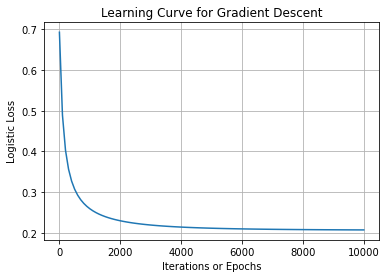

In [11]:
import matplotlib.pyplot as plt
epochs = range(0,n_iterations+1,100)
plt.plot(epochs,cost_function)
plt.title('Learning Curve for Gradient Descent')
plt.xlabel('Iterations or Epochs')
plt.ylabel('Logistic Loss')
plt.grid()
plt.show()

Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Answer :
Regularization is a technique used to prevent overfitting in machine learning models, including logistic regression. Overfitting occurs when a model learns the noise in the training data and is unable to generalize to new, unseen data. This can happen when the model has too many parameters, which allows it to fit the training data very closely but makes it less likely to generalize well.

There are two common types of regularization used in logistic regression: L1 and L2 regularization. L1 regularization, also known as Lasso regularization, adds a penalty term to the logistic regression cost function that is proportional to the absolute value of the model's coefficients. This penalty encourages the model to have fewer non-zero coefficients, effectively performing feature selection and reducing the complexity of the model.

L2 regularization, also known as Ridge regularization, adds a penalty term to the logistic regression cost function that is proportional to the square of the model's coefficients. This penalty encourages the model to have smaller coefficients overall, effectively reducing the magnitude of the coefficients and smoothing the decision boundary.
Both L1 and L2 regularization help prevent overfitting by discouraging the model from becoming too complex and fitting the noise in the training data. By adding a penalty to the cost function, the model is encouraged to prioritize simpler solutions that generalize better to new, unseen data.

Overall, regularization is a powerful tool that can be used to improve the performance of logistic regression models and prevent overfitting.

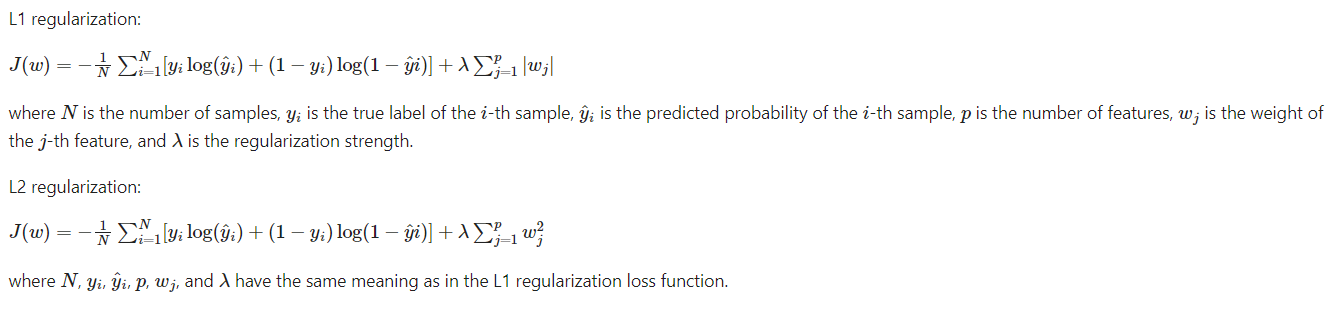

##### Note that the first term in both loss functions is the binary cross-entropy loss, which measures the difference between the predicted probability and the true label. The second term is the regularization penalty, which encourages the weights to be small (in the case of L2) or sparse (in the case of L1).

Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression
model?

Answer :

The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model, such as logistic regression. It is created by plotting the true positive rate (TPR) on the y-axis and the false positive rate (FPR) on the x-axis, at various threshold settings.

The TPR is the proportion of positive cases that are correctly classified as positive by the model, while the FPR is the proportion of negative cases that are incorrectly classified as positive by the model. By varying the threshold at which we classify a case as positive or negative, we can generate a range of TPR and FPR values and plot them on the ROC curve.
A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in a point at the top left corner of the ROC curve. A random classifier, on the other hand, would have a diagonal line from the bottom left corner to the top right corner, indicating that the TPR and FPR are equal at all thresholds.

In general, a better classifier will have a ROC curve that is closer to the top left corner of the plot. We can quantify the overall performance of the model by calculating the area under the curve (AUC) of the ROC curve. A perfect classifier will have an AUC of 1, while a random classifier will have an AUC of 0.5.

The ROC curve and AUC are useful tools for evaluating the performance of a logistic regression model because they provide a way to compare different models and to visualize the trade-off between sensitivity (TPR) and specificity (1 - FPR) at different thresholds. The ROC curve is also robust to imbalanced classes, unlike other evaluation metrics such as accuracy, which can be misleading in the presence of class imbalance.

Below is example in python showing ROC curve and ROC_AUC Score :

ROC AUC Score : 0.9253




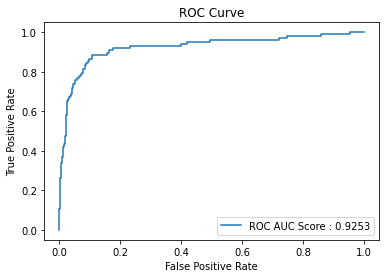

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Fit logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Predict probabilities for test set
probs = clf.predict_proba(X)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y, probs)

# Calculate AUC
auc = roc_auc_score(y, probs)
print('ROC AUC Score : %.4f' % auc)

print('\n===================================================================\n')

# Plot ROC curve
plt.plot(fpr, tpr,label=f"ROC AUC Score : {auc:.4f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Q5. What are some common techniques for feature selection in logistic regression? How do these
techniques help improve the model's performance?

Answer :
Feature selection is the process of selecting a subset of relevant features (or variables) from the original set of features to use in a model. In logistic regression, feature selection techniques can help to improve the model's performance by reducing the number of irrelevant or redundant features, thereby reducing overfitting and increasing interpretability.

##### Here are some common techniques for feature selection in logistic regression:

1. Univariate feature selection: This method evaluates each feature individually to determine its relationship with the target variable. It uses statistical tests such as chi-squared test, ANOVA, or correlation coefficient to rank the features based on their p-values or correlation strength. The top k features with the highest scores are selected for the model.

2. Recursive feature elimination (RFE): This method uses an iterative process to remove features from the model one by one based on their importance scores. The importance score can be derived from the coefficients of the logistic regression model or from external methods such as random forests. RFE continues to remove features until the optimal number of features is reached.

3. Lasso regularization: This method adds a penalty term to the logistic regression objective function that shrinks the coefficients of some features to zero, effectively removing them from the model. The strength of the penalty is controlled by a hyperparameter called the regularization strength. This method can select a sparse set of features that are most relevant to the target variable.

4. Principal component analysis (PCA): This method transforms the original features into a new set of linearly uncorrelated variables called principal components. These components are sorted in descending order of explained variance, and the top k components are selected for the model. This method can help to reduce multicollinearity and simplify the model.

5. Forward selection/backward elimination: These methods are stepwise selection algorithms that iteratively add or remove features from the model based on their contribution to the model's performance. Forward selection starts with an empty model and adds the best feature at each step until a stopping criterion is reached. Backward elimination starts with the full model and removes the least important feature at each step until a stopping criterion is reached.

##### These feature selection techniques help to improve the performance of logistic regression models by reducing the number of irrelevant or redundant features, which can lead to overfitting, improve interpretability, and simplify the model. By selecting a subset of the most relevant features, these techniques can also improve the model's predictive accuracy and reduce the risk of spurious correlations

Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing
with class imbalance?
Answer :

Imbalanced datasets occur when one class of the target variable is much more prevalent than the other. This can cause logistic regression models to be biased towards the majority class, leading to poor performance for the minority class. Here are some strategies for handling imbalanced datasets in logistic regression:

1. Resampling: This involves either oversampling the minority class (i.e., creating new synthetic samples from the minority class) or undersampling the majority class (i.e., randomly removing samples from the majority class). The goal is to balance the class distribution in the dataset. However, oversampling can lead to overfitting, and undersampling can result in loss of information.

2. Cost-sensitive learning: This involves assigning different misclassification costs to each class, such that misclassifying the minority class is penalized more heavily than misclassifying the majority class. This can be achieved by adjusting the threshold for class prediction, or by modifying the logistic regression objective function to include the cost matrix.

3. Class weighting: This involves assigning a higher weight to the minority class samples during model training. This can be achieved by setting the class_weight parameter in scikit-learn's LogisticRegression class to 'balanced', which automatically adjusts the weights based on the class distribution.

4. Ensemble methods: This involves combining multiple logistic regression models trained on different subsets of the dataset or with different hyperparameters. This can include bagging, boosting, or stacking methods, which can help to reduce the bias towards the majority class and improve the overall performance.

5. Anomaly detection: This involves treating the minority class as an anomaly or outlier detection problem, and using techniques such as one-class SVM or isolation forest to identify and classify the minority class samples.

##### These strategies can help to address the problem of class imbalance in logistic regression models, and improve the performance for the minority class. However, the choice of strategy may depend on the specific characteristics of the dataset and the goals of the analysis. It is important to evaluate the performance of the model using appropriate metrics such as precision, recall, F1-score, or ROC AUC, and to perform cross-validation to assess the generalization performance of the model.

Q7. Can you discuss some common issues and challenges that may arise when implementing logistic
regression, and how they can be addressed? For example, what can be done if there is multicollinearity
among the independent variables?

Answer :

Logistic regression is a powerful and widely used method for modeling binary or categorical outcomes. However, there are several issues and challenges that can arise when implementing logistic regression. Here are some common issues and possible solutions:

1. Multicollinearity: This occurs when two or more independent variables are highly correlated with each other, which can cause unstable or biased coefficient estimates. To address multicollinearity, one option is to remove one of the correlated variables from the model. Alternatively, techniques such as principal component analysis (PCA) or ridge regression can be used to reduce the dimensionality of the data and account for the collinearity.

2. Overfitting: This occurs when the model is too complex and captures noise or random fluctuations in the data, leading to poor generalization performance. To address overfitting, techniques such as regularization, cross-validation, or early stopping can be used to reduce the complexity of the model and improve its generalization performance.

3. Imbalanced data: This occurs when the two classes in the binary outcome variable are not equally represented in the dataset. To address imbalanced data, techniques such as resampling, cost-sensitive learning, or class weighting can be used to balance the class distribution and improve the performance for the minority class.

4. Outliers: This occurs when some observations in the dataset have extreme values or deviate significantly from the rest of the data. To address outliers, techniques such as robust regression, trimming, or Winsorization can be used to reduce the influence of the outliers on the model estimation.

5. Missing data: This occurs when some observations have missing values for some of the variables in the dataset. To address missing data, techniques such as imputation, complete case analysis, or multiple imputation can be used to estimate the missing values and retain as much information as possible from the incomplete data.

##### Overall, logistic regression can be a powerful tool for modeling binary outcomes, but it requires careful attention to the potential issues and challenges that can arise during implementation. By addressing these issues using appropriate techniques and strategies, we can improve the performance and interpretability of logistic regression models.

Reducing Multicolinearity using PCA Python code

In [13]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Generate a binary classification dataset with 1000 samples
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Use PCA to reduce the dimensionality of the data and account for collinearity
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,-1]

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred_prob)
print(f"Accuracy: {acc:.4f}")
print(f'ROC AUC Score : {roc:.4f}')

Accuracy: 0.8200
ROC AUC Score : 0.9110


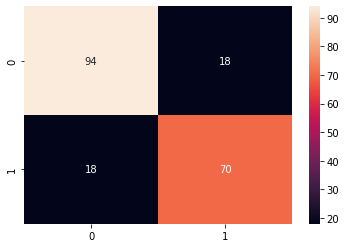

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)
plt.show()

In [15]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       112
           1       0.80      0.80      0.80        88

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

